(ch:normal-distribution)=
# 정규분포

**기본 설정**

`numpy`와 `pandas` 라이브러리를 각각 `np`와 `pd`로 불러온다.

In [1]:
import numpy as np
import pandas as pd

데이터프레임의 [chained indexing을 금지시키기 위한 설정](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy)을 지정한다.
Pandas 3.0 버전부터는 기본 옵션으로 지정된다.

In [2]:
pd.options.mode.copy_on_write = True

주피터 노트북에서 부동소수점의 출력을 소수점 이하 6자리로 제한한다.
아래 코드는 주피터 노트북에서만 사용하며 일반적인 파이썬 코드가 아니다.

In [3]:
%precision 6

'%.6f'

아래 코드는 데이터프레임 내에서 부동소수점의 출력을 소수점 이하 6자리로 제한한다.

In [4]:
pd.set_option('display.precision', 6)

데이터 시각화를 위해 `matplotlib.pyplot`를 `plt`로,
`seaborn`을 `sns`로 불러온다.
`seaborn` 라이브러리는 통계 관련 데이터의 정보를 보다 세련되고 정확하게 전달하는 그래프를 그리는 도구를 제공한다.
`matplotlib` 라이브러리를 바탕으로 만들어져서 함께 사용해도 된다.

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

그래프 스타일을 `seaborn`에서 제공하는 `white` 스타일로 지정한다.

In [6]:
sns.set_style("white")

**데이터 저장소 디렉토리**

코드에 사용되는 [데이터 저장소의 기본 디렉토리](https://github.com/codingalzi/DataSci/tree/master/data)를 지정한다.

In [7]:
data_url = 'https://raw.githubusercontent.com/codingalzi/DataSci/refs/heads/master/data/'

**주요 내용**

확률과 통계에서 가장 유명한 연속 확률 분포인 정규분포를 소개한다.

- 가우스 함수
- 표준화
- 정규분포 연산
- 정규분포 활용

## 가우스 함수

**정규분포**<font size='2'>normal distribution</font>는 
길이, 크기, 높이 등의 데이터처럼 실생활 또는 자연에서 얻어지는 값을
다룰 때 자주 접하는 확률 분포다.
예를 들어 아래 사례들이 일반적으로 정규분포를 따른다.

- 사람들의 키 또는 몸무게의 분포, 
- 대학생들의 성적 평점의 분포
- 초등학생들의 통학시간의 분포

정규분포의 확률 밀도 함수는 아래 가우스 함수로 정의된다.
단, $\mu$는 평균값을, $\sigma$는 표준편차를 가리킨다.

$$
f(x) = \frac{1}{\sigma \sqrt{2\pi}}\, \exp(-\frac{(x-\mu)^2}{2\sigma^2})
$$

아래 `f_gaussian()` 함수가 가우스 함수를 구현한다.

- `loc=0`: 평균값($\mu$). 기본값 0.
- `scale=1`: 표준편차($\sigma$). 기본값 1.

In [8]:
def f_gaussian(x, loc=0, scale=1):
    return (1 / (scale * np.sqrt(2 * np.pi))) * np.exp(-(x - loc)**2 / (2 * scale**2))

아래 코드는 평균값 $\mu$와 표준편차 $\sigma$에 따라 가우스 함수의 그래프가
어떻게 달라지는지 보여준다.

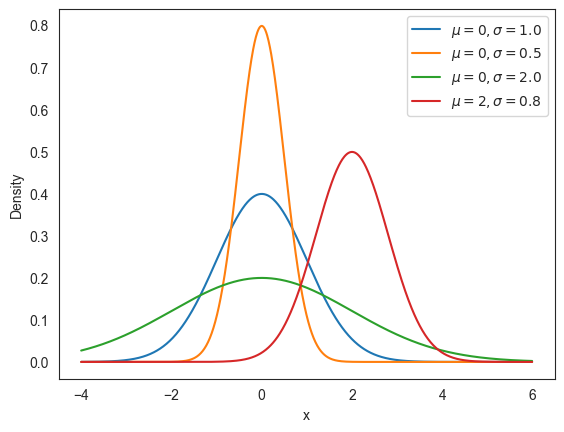

In [9]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

x = np.arange(-4, 6, 0.01)

ax.plot(x, f_gaussian(x, loc=0, scale=1.0), label=r'$\mu = 0, \sigma = 1.0$')
ax.plot(x, f_gaussian(x, loc=0, scale=0.5), label=r'$\mu = 0, \sigma = 0.5$')
ax.plot(x, f_gaussian(x, loc=0, scale=2.0), label=r'$\mu = 0, \sigma = 2.0$')
ax.plot(x, f_gaussian(x, loc=2, scale=0.8), label=r'$\mu = 2, \sigma = 0.8$')

ax.set_xlabel('x')
ax.set_ylabel(r'Density')

plt.legend()
plt.show()

확률변수 $X$가 평균값이 $\mu$이고 분산이 $\sigma^2$인
정규분포를 따를 때 아래와 같이 표기한다.  

$$
X \sim N(\mu, \sigma^2)
$$

앞서 직접 구현한 정규분포의 확률 밀도 함수(pdf) `f_gaussian()` 등 정규분포와
관련된 모든 기능을 `scipy.stats` 모듈의 `norm` 객체가 제공한다.

In [10]:
from scipy.stats import norm

예를 들어 `norm.pdf()`가 `f_gaussian()`에 해당하며,
이어지는 코드에서 대신 사용된다.

In [11]:
f_gaussian = norm.pdf

반면에 `norm.cdf()` 함수는 정규분포의 누적 분포 함수(cdf)를 가리킨다.

In [12]:
F_gaussian = norm.cdf

두 함수 모두 `loc=0`과 `scale=1`을 키워드 인자로 사용하며
각각 분포의 평균값과 표준편차를 지정한다.

**정규분포의 기댓값과 분산**

정규분포의 기댓값과 분산은 각각 데이터의 평균값, 분산과 일치한다.
즉 다음이 성립한다.

$$
X \sim N(\mu, \sigma^2) \quad \Longrightarrow \quad E[X] = \mu,\,\, V(X) = \sigma^2
$$

### 표준정규분포

표준정규분포는 평균값이 0, 표준편차가 1인 정규분포다.
아래 코드는 표준정규분포의 확률 밀도 함수만 따로 떼어 그래프로 나타낸다.

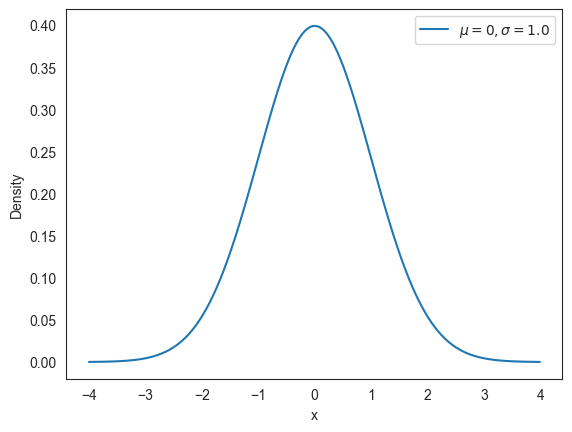

In [13]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

x = np.arange(-4, 4, 0.01)

ax.plot(x, f_gaussian(x, loc=0, scale=1.0), label=r'$\mu = 0, \sigma = 1.0$')

ax.set_xlabel('x')

ax.set_xlabel('x')
ax.set_ylabel(r'Density')
ax.legend()

plt.show()

### 정규분포 확률

아래 그래프는 
$X \sim N(0, 1)$일 때, $X$가 $a$보다 같거나 작은 값을 취할 확률 $P(X \leq a)$를
영역으로 보여준다.
즉, $a$ 보다 같거나 작은 구간에서 확률 밀도 함수 곡선과 $x$-축 사이의 면적이다.

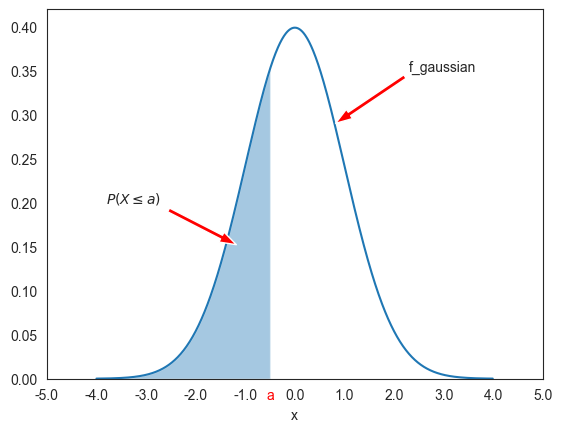

In [14]:
x = np.arange(-4, 4, 0.01)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# norm.pdf()
ax.plot(x, f_gaussian(x, 0, 1))

# -2에서 1 사이의 면적 표시
point_a = -0.5
ax.fill_between(x, f_gaussian(x), where=(x <= point_a), alpha=0.4)

# 함수명 주석 달기
ax.annotate(r'f_gaussian', xy=(.807, f_gaussian(.8)), xytext=(2.3, 0.35),
            arrowprops=dict(facecolor='red', shrink=0.01, width=3, headwidth=8))

ax.annotate(r'$P(X \leq a)$', xy=(-1.1 ,0.15), xytext=(-3.8, 0.2),
            arrowprops=dict(facecolor='red', shrink=0.05, width=3, headwidth=8))

# point_a를 눈금으로 추가 표시
x_ticks = np.append(ax.get_xticks(), point_a)
x_ticks_ = np.append(ax.get_xticks(), 'a') # 실제로 보이는 눈금 기호
ax.set_xticks(x_ticks, x_ticks_)
ax.get_xticklabels()[-1].set_color("red") # a 눈금 색 지정

ax.set_xlabel('x')
ax.set_ylim(0, 0.42)

plt.show()

위 그래프는 `a=-0.5`일 때의 $P(X \leq a)$를 보여주며 실제 계산은 `F_gaussian()` 함수를 
이용하면 된다.

In [15]:
F_gaussian(-0.5)

0.308538

반면에 아래 그래프는 
$X \sim N(0, 1)$일 때, $X$가 $a$와 $b$ 사이의 값을 취할 확률 $P(a \le X \le b)$를
구간 $a$와 $b$ 사이에서 확률 밀도 함수 곡선과 $x$-축 사이의 면적으로 보여준다.

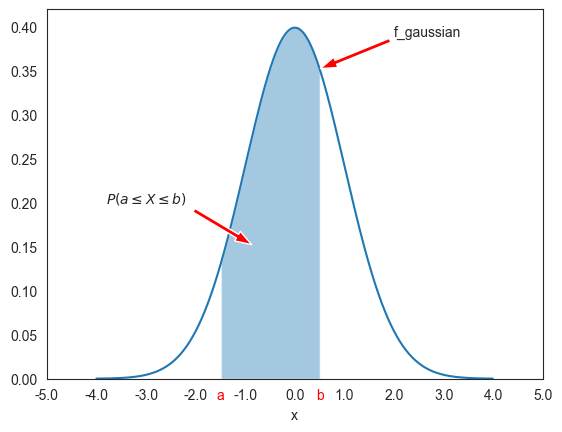

In [16]:
x = np.arange(-4, 4, 0.01)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# norm.pdf()
ax.plot(x, f_gaussian(x, 0, 1))

# -2에서 1 사이의 면적 표시
point_a = -1.5
point_b = 0.5
ax.fill_between(x, f_gaussian(x), where=(point_a <= x) & (x <= point_b), alpha=0.4)

# 함수명 주석 달기
ax.annotate(r'f_gaussian', xy=(0.5, f_gaussian(0.5)), xytext=(2, 0.39),
            arrowprops=dict(facecolor='red', shrink=0.01, width=3, headwidth=8))

ax.annotate(r'$P(a \leq X \leq b)$', xy=(-.8 ,0.15), xytext=(-3.8, 0.2),
            arrowprops=dict(facecolor='red', shrink=0.05, width=3, headwidth=8))

# point_a와 point_b를 눈금으로 추가 표시
x_ticks = np.append(ax.get_xticks(), [point_a, point_b])
x_ticks_ = np.append(ax.get_xticks(), ['a', 'b']) # 실제로 보이는 눈금 기호
ax.set_xticks(x_ticks, x_ticks_)
ax.get_xticklabels()[-2].set_color("red") # a 눈금 색 지정
ax.get_xticklabels()[-1].set_color("red") # b 눈금 색 지정

ax.set_xlabel('x')
ax.set_ylim(0, 0.42)

plt.show()

위 그래프는 `a=-1.5`이고 `b=0.5`일 때의 $P(a \leq X \leq b)$를 보여주며 실제 계산은 `F_gaussian()` 함수를 
이용한다.

In [17]:
F_gaussian(0.5) - F_gaussian(-1.5)

0.624655

### 예제: 피어슨  데이터셋

아래 코드는 피어슨<font size='2'>Pearson</font>이 1903년에 실험을 위해 수집한
아버지와 아들의 키로 구성된 데이터셋을 불러온다.
원래 인치 단위를 사용하지만 편의를 위해 센티미터 단위로 변환되었다.

In [18]:
pearson = pd.read_csv(data_url+"pearson_dataset.csv", header=0)

처음 다섯 가족의 아버지 키와 아들 키 데이터는 다음과 같다.

In [19]:
pearson.head()

,Father,Son
0,165.1,151.9
1,160.8,160.5
2,165.1,160.8
3,167.1,159.5
4,155.2,163.3


아버지 키와 아들 키 각각 총 1,078개의 부동소수점 값이 포함되었다.

In [20]:
pearson.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1078 entries, 0 to 1077
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Father  1078 non-null   float64
 1   Son     1078 non-null   float64
dtypes: float64(2)
memory usage: 17.0 KB


**밀도 히스토그램 확인**

먼저 아들 키의 분포를 확인하기 위해 밀도 히스토그램과 
커널 밀도 추정(KDE) 기법으로 찾아진 확률 밀도 함수의 그래프를 함께 그린다.

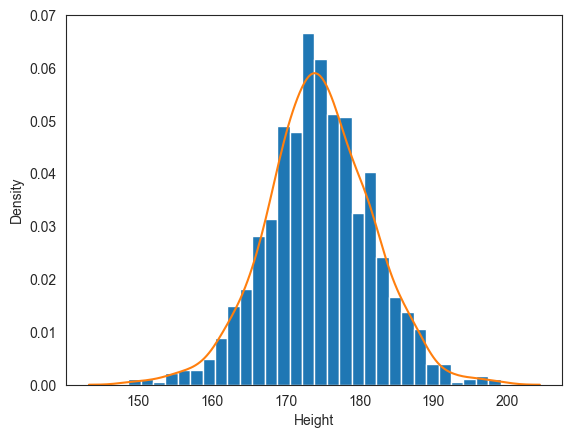

In [21]:
fig, ax = plt.subplots()

# 아들 키 밀도 히스토그램
pearson['Son'].plot.hist(ax=ax, bins=30, density=True, legend=False)

# KDE 기법으로 계산된 확률 밀도 함수 그래프
kde = sns.kdeplot(ax=ax, data=pearson['Son'])

ax.set_xlabel('Height')
ax.set_ylabel('Density')

plt.show()

그래프를 보면 평균값을 중심으로 거의 좌우 대칭을 이루는 분포를 따른다.
즉, 아들 키가 정규분포를 따르는 것처럼 보인다.
이를 확인하기 위해 먼저 평균값과 분산을 계산한다.

In [22]:
desc_son = pearson['Son'].describe()
desc_son

count    1078.000000
mean      174.457978
std         7.153552
min       148.600000
25%       169.900000
50%       174.200000
75%       179.100000
max       199.100000
Name: Son, dtype: float64

- 아들 키 평균값

In [23]:
mu_son = desc_son.loc['mean']
mu_son

174.457978

- 아들 키 표준편차

In [24]:
sigma_son = desc_son.loc['std']
sigma_son

7.153552

**정규분포 확인**

아래 코드는 `mu_son`과 `sigma_son`을 각각 평균값과 표준편차로 갖는 정규분포의 확률 밀도 함수 그래프와
앞서 KDE 기법으로 계산된 확률 밀도 함수 그래프가 거의 동일하게 그려짐을 확인해준다.

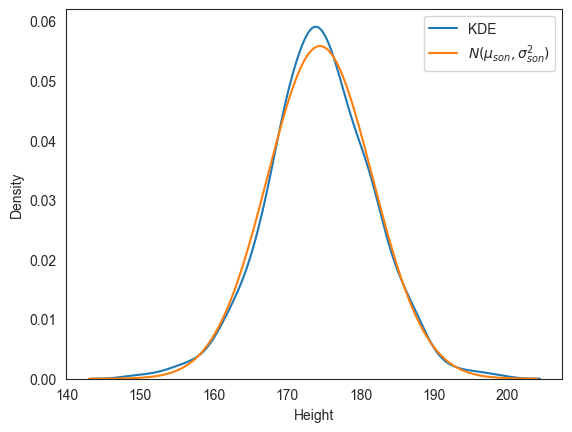

In [25]:
fig, ax = plt.subplots()

# 아들 키 데이터에 대해 KDE 기법으로 추정된 확률 밀도 함수 그래프
kde = sns.kdeplot(ax=ax, data=pearson['Son'], label='KDE')

# mu_son와 sigma_son를 이용한 정규분포의 확률 밀도 함수 그래프
x = np.arange(143, 204, 0.01)
f = lambda y: f_gaussian(y, mu_son, sigma_son)
ax.plot(x, f(x), label=r'$N(\mu_{son}, \sigma_{son}^2)$')

ax.set_xlabel('Height')
ax.set_ylabel('Density')

ax.legend()

plt.show()

표준편차가 7.15 정도로 1보다 많이 크기에 정규분포에 비해 보다 펑퍼짐한 봉우리로
그려져야 하지만 표준정규분포에 가깝도록 보인다.
하지만 이는 $y$-축이 0에서 0.4가 아닌 0에서 0.06 사이로 설정되었기에
일종의 착시현상임에 주의한다.

**정규분포 활용**

앞서 확인하였듯이 아들 키를 가리키는 확률변수 $X$는
다음과 같이 앞서 계산된 평균값과 표준편차를 갖는 정규분포를 따른다고 간주해도 무방하다.

$$
X_{son} \sim N(\mu_{son}, \sigma_{son}^2)
$$

따라서 다음과 같이 `norm` 객체를 이용하여 아들 키를 가리키는 확률변수를 선언한다.
`norm` 객체를 활용할 때 함수처럼 평균값과 표준편차를 지정할 수 있음에 주의한다.

In [26]:
X_son = norm(loc=mu_son, scale=sigma_son)

평균값과 표준편차가 이미 지정되었기에 확률 밀도 함수(pdf)와 누적 분포 함수(cdf) 등은 추가 인자 없이 바로 활용된다.
예를 들어 아래 코드는 임의로 선택된 아들 키가 평균값 이하일 확률이 50%임을 확인해준다.

In [27]:
X_son.cdf(mu_son)

0.500000

아래 코드는 우연히 선택된 아들 키가 180 이상일 확률 $P(X \geq 180)$를 
정규분포의 확률 밀도 함수의 그래프와 $x$-축 사이의 특정 구간의 영역으로 보여준다.

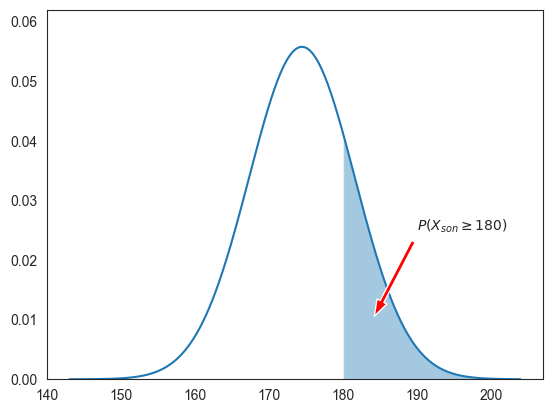

In [28]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

x = np.arange(143, 204, 0.01)
f = X_son.pdf
ax.plot(x, f(x))
ax.fill_between(x, f(x), where=(x >= 180), alpha=0.4)

ax.annotate(r'$P(X_{son} \geq 180)$', xy=(184 ,0.01), xytext=(190, 0.025),
            arrowprops=dict(facecolor='red', shrink=0.04, width=3, headwidth=8))

ax.set_ylim(0, 0.062)

plt.show()

우연히 선택된 아들 키가 180 이상일 확률 $P(X_{son} \geq 180)$의 계산은 `X_xon.cdf()` 함수를 이용한다.

In [29]:
1 - X_son.cdf(180)

0.219252

**실제 확률 비교**

아래 코드는 데이터셋에서 아들 키가 180 이상인 샘플의 비율을 이용하여
아들 키가 180 이상일 확률을 직접 계산한다.

In [30]:
# 180 이상인 경우만 True
mask_180 = pearson['Son'] >= 180

# 전체 데이터셋에서 True인 샘플의 비율
mask_180.sum()/len(pearson)

0.221707

실제 값과 정규분포의 누적 분포 함수를 이용하여 계산된 값이 매우 유사하다.
따라서 앞으로는 실제 값을 구하는 대신 정규분포의 성질과 기능만을 활용하여
확률을 계산한다.

**$P(180 \leq X_{son} \leq 185)$ 계산**

아래 코드는 우연히 선택된 아들 키가 180 이상, 185 이하일 확률 $P(180 \leq X_{son} \leq 185)$를 그래프로 보여준다.

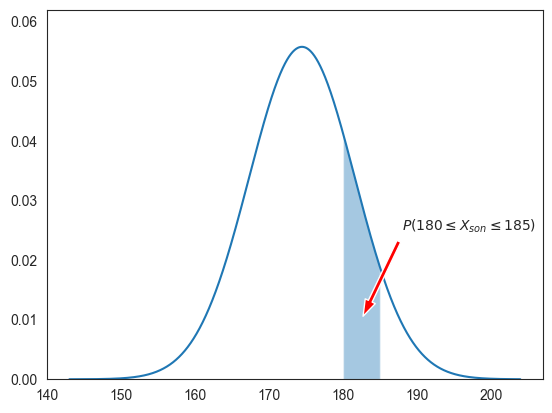

In [31]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

x = np.arange(143, 204, 0.01)
f = X_son.pdf

ax.plot(x, f(x))
ax.fill_between(x, f(x), where=(x >= 180) & (x <= 185), alpha=0.4)

ax.annotate(r'$P(180 \leq X_{son} \leq 185)$', xy=(182.5 ,0.01), xytext=(188, 0.025),
            arrowprops=dict(facecolor='red', shrink=0.04, width=3, headwidth=8))

ax.set_ylim(0, 0.062)

plt.show()

아들 키를 가리키는 확률변수 $X_{son}$이 정규분포 $N(173.5, (5.17)^2)$ 을 따를 때
키 180 이상, 185 이하의 값을 가리킬 확률 $P(180 \leq X_{son} \leq 185)$는 다음과 같이 계산된다.

In [32]:
X_son.cdf(185) - X_son.cdf(180)

0.148967

## 정규분포 표준화

{numref}`%s절 <sec:scaling>`에서 소개한 표준화는 데이터의 분포를 평균값은 0, 표준편차는 1이 되도록 하며,
이를 확률변수가 가리킬 수 있는 값들에 대해 적용해도 동일하다.

임의의 확률변수 $X$에 대해 $X$가 가리키는 값의 표준 점수를 가리키는 확률변수 $Z$를 다음과 같이 정의한다.
그러면 확률변수 $Z$가 가리키는 값들의 평균값 $\mu_Z$와 표준편차 $\sigma_Z$는 각각 0과 1이 된다.
단, $\mu_X$와 $\sigma_X$는 각각 $X$가 가리키는 값의 평균값과 표준편차다.

$$
Z = \frac{X-\mu_X}{\sigma_X}
$$

확률변수 $X$가 만약 정규분포를 따른다면,
즉 만약 $X \sim N(\mu, \sigma^2)$이 성립하면
확률변수 $Z$는 표준정규분포를 따른다.

$$
Z \sim N(0,1)
$$

예를 들어 아들 키 180과 185의 표준 점수는 다음과 같다.

- 180의 표준점수: 

In [33]:
z_180 = (180 - mu_son)/sigma_son
z_180

0.774723

- 185의 표준점수

In [34]:
z_185 = (185 - mu_son)/sigma_son
z_185

1.473677

**표준화 이전과 이후의 확률**

정규분포를 따르는 확률변수를 표준화한 다음에는 평균값과 표준편차만 다를뿐
표준화 이전과 이후의 확률값은 달라지지 않는다.

- (키 180 이상일 확률) = (표준 점수가 0.774723 이상일 확률)

In [35]:
(1 - X_son.cdf(180)) == (1 - F_gaussian(z_180))

True

- 키 180 이상, 185 이하일 확률 = 표준 점수가  0.774723 이상, 1.473677 이하일 확률

In [36]:
(X_son.cdf(185) - X_son.cdf(180)) == (F_gaussian(z_185) - F_gaussian(z_180))

True

## 정규분포 특징

지금까지 살펴 보았듯이 
정규분포를 따르는 데이터의 확률 밀도 함수 그래프는 종 모양의 봉우리 모양을 가지며
아래 특성을 갖는다. 

- 그래프의 봉우리가 평균값 $\mu$ 근처에서 가장 높고 데이터의 분포가 $\mu$를 중심으로 좌우 대칭을 이룬다.
- 곡선은 $x$-축과 절대로 만나지 않으면서 $\mu$에서 멀어질 수록 점점 $x$-축에 가까워진다.  
- $\sigma$ 가 커지면 곡선은 넓고 평평해진다.  
- 곡선과 $x$-축 사이의 면적은 항상 1이다.

그런데 확률 밀도 함수가 종 모양과 조금 다른 그래프를 그린다 하더라도 정규 분포로 인정받는 경우가 있다.
반면에 데이터 분포가 완벽한 대칭을 이루는 종 모양을 갖더라도 정규 분포가 아닌 경우도 많다.

**정규 분포 예제: 아버지 키**

피어슨 데이터셋에서 아버지 키의 분포를 확인해보자.
아래 코드는 아버지 키 데이터의 밀도 히스토그램과
KDE 기법으로 추정된 확률 밀도 함수(pdf0의 그래프를 그린다.

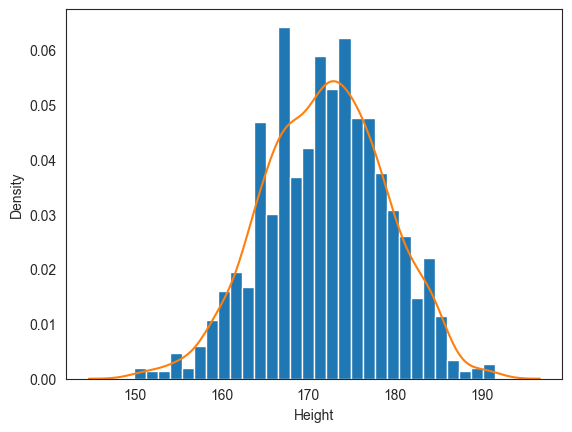

In [37]:
fig, ax = plt.subplots()

# 아들 키 밀도 히스토그램
pearson['Father'].plot.hist(ax=ax, bins=30, density=True, legend=False)

# KDE 기법으로 계산된 확률 밀도 함수 그래프
kde = sns.kdeplot(ax=ax, data=pearson['Father'])

ax.set_xlabel('Height')
ax.set_ylabel('Density')

plt.show()

밀도 히스토그램과 확률 밀도 함수 모두 정규 분포와 거리가 있어 보인다.
이번엔 아버지 키의 평균값과 표준편차를 갖는 정규분포의 확률 밀도 함수 그래프와
KDE 기법으로 추정된 확률 밀도 함수의 그래프를 함께 그려보자.

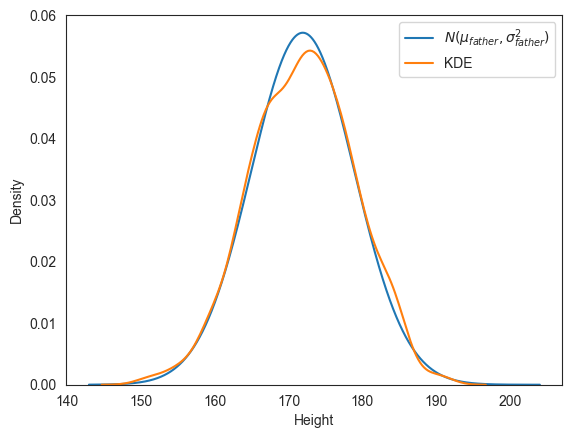

In [38]:
# 아버지 키의 평균값과 표준편차
mu_father = pearson['Father'].mean()
sigma_father = pearson['Father'].std()

fig, ax = plt.subplots()

# mu_father와 sigma_father를 이용한 정규분포의 확률 밀도 함수 그래프
x = np.arange(143, 204, 0.01)
f = lambda y: f_gaussian(y, mu_father, sigma_father)
ax.plot(x, f(x), label=r'$N(\mu_{father}, \sigma_{father}^2)$')

# 아버지 키 데이터에 대해 KDE 기법으로 추정된 확률 밀도 함수 그래프
kde = sns.kdeplot(ax=ax, data=pearson['Father'], label='KDE')

ax.set_xlabel('Height')
ax.set_ylabel('Density')

ax.legend()

plt.show()

두 함수의 그래프가 서로 조금 다르기는 하지만 평균값을 중심으로 좌우로 퍼져있는 정도와
대칭성이 거의 일치한다. 따라서 아버지 키 데이터 또한 정규분포를 따른다고 말할 수 있다.

**정규분포가 아닌 예제: t-분포**

t-분포는 정규분포를 따르는 모집단의 평균값이 위치하는 구간을 추정할 때 사용되는 분포이며,
자유도에 따라 데이터 분포가 달라진다.
t-분포에 대해서는 나중에 자세히 다룰 것이며 여기서는 정규분포와 유사하지만 
정규분포는 아닌 하나의 예제로만 활용한다.

먼저 자유도($\nu$)가 3인 t-분포 $t_\nu$를 가리키는 변수 `t_nu`를 선언한다.

In [39]:
from scipy.stats import t

nu = 3
t_nu = t(nu)

아래 코드는 $t_\nu$-분포의 확률 밀도 함수 그래프를 그린다.

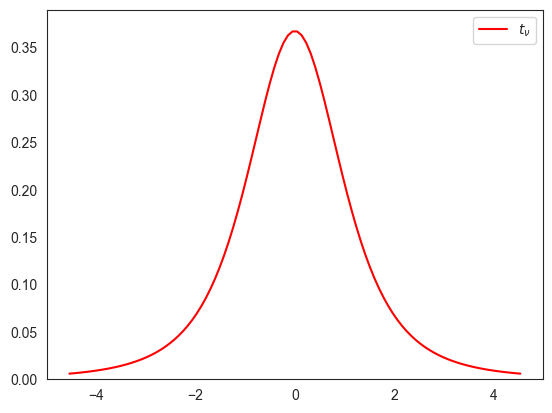

In [40]:
fig, ax = plt.subplots(1, 1)

x = np.linspace(t_nu.ppf(0.01), t_nu.ppf(0.99), 100)
ax.plot(x, t_nu.pdf(x), color='red', label=r'$t_\nu$')

ax.set_ylim(0, 0.39)
ax.legend()

plt.show()

:::{admonition} 확률분포의 `ppf()` 메서드
:class: note

위 코드에 사용된 분포 객체의 `ppf()` 메서드는 
백분위수 함수<font size='2'>percent point function</font>이며,
누적 분포 함수(cdf)의 역함수에 해당한다.
즉, 다음이 성립한다.

```
cdf(x) = p <=> ppf(p) = x
```

예를 들어 `x = t_nu.ppf(0.01)`는
자유도가 3인 t-분포를 따르는 확률 변수 `t_nu`가 `x` 보다 작은 값을 가질 확률이 1%라는 의미다.
따라서 `t_nu`의 확률 밀도 함수는 `x`에서 0에 매우 가까운 함숫값을 갖는다.
동일한 방식으로 `t_nu.ppf(0.99)`가 가리키는 값이 평균값을 기준으로 `t_nu.ppf(0.01)`에
대칭되는 값을 가리킴을 쉽게 이해할 수 있다.

이런 두 함숫값의 성질을 이용하여 위 코드에서 두 값을 $x$-축의 범위로 지정하였다.
:::

$t_\nu$-분포의 확률 밀도 함수 그래프만 보면 정규분포처럼 보인다.
이를 확인하기 위해 위 그래프를 
$t_\nu$-분포와 동일한 평균값과 표준편차를 갖는 정규분포의 확률 밀도 함수 그래프와
함께 그려보자.

다음 `X_normal` 변수는
$t_\nu$-분포와 동일한 평균값과 표준편차를 갖는 정규분포를 따르는 확률 변수를 가리킨다.

In [41]:
mu_nu = t_nu.mean()
sigma_nu = t_nu.std()
X_normal = norm(mu_nu, sigma_nu)

아래 코드는 두 분포의 확률 밀도 함수 그래프가 매우 다르게 그려짐을 확인해준다.

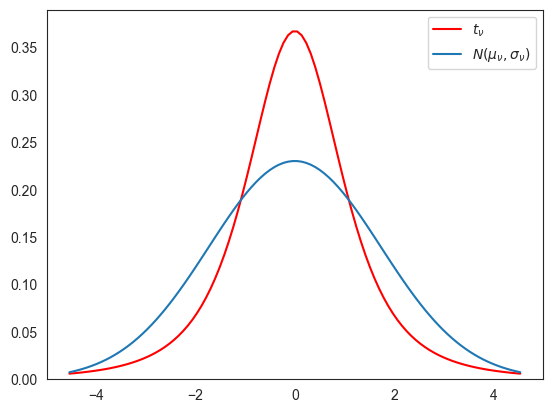

In [42]:
fig, ax = plt.subplots(1, 1)

x = np.linspace(t_nu.ppf(0.01), t_nu.ppf(0.99), 100)
ax.plot(x, t_nu.pdf(x), color='red', label=r'$t_\nu$')
ax.plot(x, X_normal.pdf(x), label=r'$N(\mu_\nu, \sigma_\nu)$')

ax.set_ylim(0, 0.39)
ax.legend()

plt.show()

**정규분포와 표준편차**

정균분포를 특징짓는 성질이 하나 더 있으며 바로 표준편차와 관련된 확률값이다.
임의의 정규분포 $X \sim N(\mu, \sigma)$에 대해
평균값을 기준으로 좌우 $\sigma$, $2\sigma$, $3\sigma$와 관련된 확률값이 
아래 그래프에 표시된 대로 계산된다.

<p><div align="center"><img src="https://raw.githubusercontent.com/codingalzi/DataSci/master/jupyter-book/images/standard_deviation_diagram.png" style="width:700px"></div></p>

표준정규분포를 대상으로 실제로 확률값을 계산해보자.
여기서는 편의상 표준정규분포를 이용하지만 임의의 정규분포에 대해서 확률값은 동일하다.

In [43]:
mu = 0
sigma = 1

- 평균값 $\mu$부터 $\sigma$까지의 영역의 크기

In [44]:
F_gaussian(sigma, mu, sigma) - F_gaussian(mu, mu, sigma)

0.341345

- 평균값 $\mu$를 중심으로 좌우 $\sigma$ 만틈 떨어진 영역의 크기

In [45]:
F_gaussian(sigma, mu, sigma) - F_gaussian(-sigma, mu, sigma)

0.682689

- 평균값 $\mu$부터 $2\sigma$까지의 영역의 크기

In [46]:
F_gaussian(2*sigma, mu, sigma) - F_gaussian(mu, mu, sigma)

0.477250

- 평균값 $\mu$를 중심으로 좌우 $2\sigma$ 만틈 떨어진 영역의 크기

In [47]:
F_gaussian(2*sigma, mu, sigma) - F_gaussian(-2*sigma, mu, sigma)

0.954500

- 평균값 $\mu$를 중심으로 좌우 $3\sigma$ 만틈 떨어진 영역의 크기

In [48]:
F_gaussian(3*sigma, mu, sigma) - F_gaussian(-3*sigma, mu, sigma)

0.997300

- 평균값 $\mu$부터 $3\sigma$까지의 영역의 크기

In [49]:
F_gaussian(3*sigma, mu, sigma) - F_gaussian(mu, mu, sigma)

0.498650

- 평균값 $\mu$를 중심으로 좌우 $3\sigma$ 만틈 떨어진 영역의 크기

In [50]:
F_gaussian(3*sigma, mu, sigma) - F_gaussian(-3*sigma, mu, sigma)

0.997300

- 평균값 $\mu$를 중심으로 좌우 $3\sigma$ 만틈 떨어진 영역의 크기

In [51]:
F_gaussian(3*sigma, mu, sigma) - F_gaussian(-3*sigma, mu, sigma)

0.997300

## 정규분포 활용

### 이항 분포 확률 계산

동일한 시도를 $n$번 반복할 때, 매 시도에서 $p$의 확률로 발생하는 사건이 발생하는 빈도를 가리키는 확률변수가
따르는 분포를 **이항분포**라 한다.
단, 각각의 시도는 상호 독립적이어야 한다.

이항분포를 따르는 확률변수 $X$를 다음과 같이 표기한다.

$$
X ∼ B(n,p)
$$

확률변수가 위 이항분포를 따를 때 해당 사건이 $k$번 발생할 확률은 다음과 같이 계산된다.

$$
P(X = k) = \binom{n}{k}\, p^k\, (1-p)^{n-k}
$$

위 식에서 $\binom{n}{k}$는 서로 다른 $n$개 중에서 $k$개를 선택하는 경우의 수를 가리킨다.

$$
\binom n k = \frac{n!}{k!\, (n-k)!}
$$

**예제: 5지선다 40문제를 임의로 찍어서 30 문제 이상 맞힐 확률**

5지선다 문제 하나를 임의로 답을 찍어 맞힐 확률은 1/5, 즉 0.2다.
40문제 각각에 대해 임의로 답을 찍는 행위는 서로 독립적이기에
40문제 중에서 맞히는 답의 수는 다음 이항분포를 따른다.

$$
X_{bin} \sim B\left (40, 0.2\right )
$$

따라서 40문제 중 15문제 이상 맞힐 확률은 아래와 같이 계산된다.

$$
\sum_{k=15}^{40} \binom{40}{k}\,\left (\frac{1}{5}\right )^{k}\,\left (\frac{4}{5}\right )^{40-k} =
\binom{40}{15}\,\left (\frac{1}{5}\right )^{15}\,\left (\frac{4}{5}\right )^{25}
+ \cdots
+ \binom{40}{40}\,\left (\frac{1}{5}\right )^{40}\,\left (\frac{4}{5}\right )^{0}
$$

그런데 위 계산은 너무 수고스럽거나, 너무 오래 걸리거나, 경우에 따라 계산이 불가능하다.
이유는 $n!$ 등의 계산이 $n$이 조금만 커져도 너무 오래 걸리거나 심지어 웬만한 PC로도
불가능해지기 때문이다.

이런 경우 정규분포를 활용할 수 있다.
단, 다음 조건이 성립해야 한다. 

$$
X_{bin} \sim B(n, p), \quad n p>5, \quad n (1-p)>5
$$

그러면 확률변수 $X_{bin}$는 평균값은 $n p$, 분산은 $n p (1-p)$인 정규분포를 따른다고 간주해도 된다.
즉 다음이 성립한다.

$$
X_{bin} \sim N(n p, n p (1-p))
$$

그리고 
$40 \cdot 0.2 = 8$, $40 \cdot 0.8 = 32$ 이기에 확률변수 $X$가 $N(8, 6.4)$의 정규분포를 따른다고 말할 수 있다.
아래 코드의 `X_contiuous` 변수가 위 정규분포를 따르는 연속 확률변수 $X_{bin}$를 가리킨다.

In [52]:
X_continuous = norm(8, np.sqrt(6.4))

이제 40문제중 15문제 이상을 맞힐 확률 $P(X_{bin} \geq 15)$은 다음과 같이 쉽게 계산된다.

In [53]:
1 - X_continuous.cdf(15)

0.002829

반면에 7 문제 이하로 맞힐 확률은 다음과 같다.

In [54]:
X_continuous.cdf(7)

0.346316

그런데 위 결과들이 정확하지 않다.
실제로 이항분포의 누적 분포 함수를 이용하여 계산하면 많이 다른 확률값이 계산된다.
이를 위해 `scipy.stats` 모듈의 `binom` 객체를 활용한다.
아래 코드의 `X_discrete` 변수가 5지선다 40문제를 임의로 찍었을 때 맞히는 문제의 개수를 가리키는 확률변수를 선언한다.

In [55]:
from scipy.stats import binom

n = 40
p = 0.2

X_discrete = binom(n, p)

이산일 때의 $P(X_{bin} \geq 15)$는 다음과 같다.

In [56]:
1 - X_discrete.cdf(14)

0.007916

반면에 이산일 때의 $P(X_{bin} \leq 7)$는 다음과 같다.

In [57]:
X_discrete.cdf(7)

0.437146

이렇게 오차가 크게 발생하는 이유는 이산 확률변수를 연속 확률변수로 간주할 때 항상 발생하며
이런 오차를 보정해야만 보다 정확한 확률값을 계산할 수 있다.
이산에서 연속으로 변환할 때 발생하는 오차를 보정하는 기법을
연속성 보정이라 한다.
이어서 보다 단순한 이항분포를 이용하여 자세히 설명한다.

### 연속성 보정

이항분포를 정규분포로 대체하여 확률을 계산할 때 주의할 점이 하나 있다.
설명을 위해 정상적인 동전을 반복해서 12번 던졌을 때 앞면이 5번 이하로 나올 확률을 계산해보자.

정상적인 동전을 던졌을 때 앞면이 나올 확률은 0.5이며, 
동전을 던질 때마다의 결과는 이전 결과와 아무 상관이 없다.
즉, 12번의 동전던지기가 상호 독립적이며, 따라서 
동전을 12번 던져서 앞면이 나오는 횟수를 가리키는 확률변수 $X$는 다음 이항분포를 따른다.

$$
X \sim B(12, 0.5)
$$

In [58]:
from scipy.stats import binom

n = 12
p = 0.5

X_12 = binom(n, p)

**예제: 정상적인 동전을 12번 던져서 앞면이 5번 이하 나올 확률**

$X \sim B(12, 0.5)$가 성립하기에 $P(X \leq 5)$는 다음과 같이 계산된다.

In [59]:
P_less5 = X_12.cdf(5)
P_less5

0.387207

반면에, $12 \cdot 0.5 = 6 > 5$가 성립하여, $P(X \le 5)$를 계산하기 위해
$X \sim N(6,3)$을 활용할 수 있다.
그런데 정규분포를 이용한 계산이 기대와는 다른 결과를 보여준다.

In [60]:
F_gaussian(5, 6, np.sqrt(3))

0.281851

앞서 정규분포를 사용하여 이항분포의 확률을 계산해도 된다고 하였는데,
전혀 비슷하지 않은 결과가 나왔다.
원인을 찾기 위해 먼저 막대그래프를 이용한다.

이산 확률변수로서의 $X$가 $X \sim B(12, 0.5)$일 때
$P(X \leq 5)$은 아래 그래프에서 빨강색으로 칠해진 막대들의 면적에 해당한다.

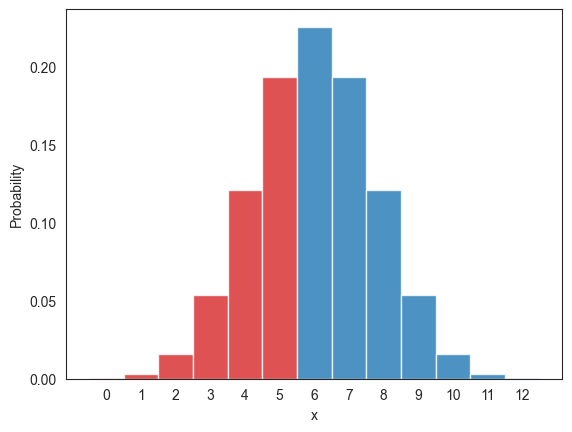

In [61]:
fig, ax = plt.subplots(1, 1)

# 이항분포 확률 질량 함수 그래프
x1 = range(13)
bar_colors = ['tab:red']*6 + ['tab:blue']*7
z = ax.bar(x1, X_12.pmf(x1), color=bar_colors, width=1., alpha=.8)

ax.set_xticks(range(0, 13))
ax.set_xlabel('x')
ax.set_ylabel('Probability')

plt.show()


반면에 아래 코드는 $X$가 정규분포 $N(6, 3)$을 따른다고 가정했을 때의 확률 밀도 함수 그래프를 함께 그린다.
옅은 검정색으로 칠해진 영역은 연속 확률변수로서의 $P(X \leq 5)$에 해당한다.

그런데 이산일 때의 $P(X \leq 5)$가 연속일 때의 $P(X \leq 5)$보다 화살표로 표시된 영역만큼 더 크다.

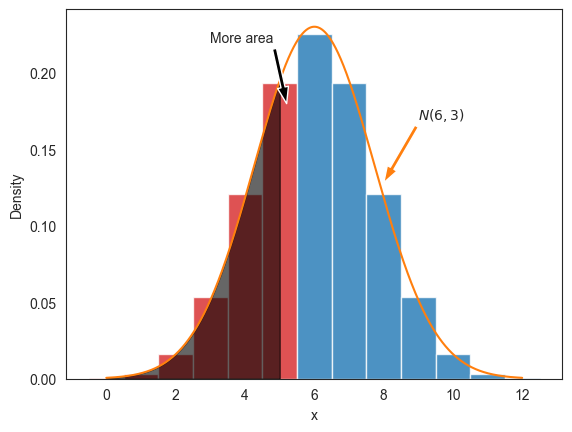

In [62]:
fig, ax = plt.subplots(1, 1)

# 이항분포 확률 질량 함수 그래프
x1 = range(13)
bar_colors = ['tab:red']*6 + ['tab:blue']*7
z = ax.bar(x1, X_12.pmf(x1), color=bar_colors, width=1., alpha=.8)

# 정규분포 확률 밀도 함수 그래프
x2 = np.arange(0, 12, 0.01)
ax.plot(x2, f_gaussian(x2, 6, np.sqrt(3)), color='tab:orange')
ax.fill_between(x2, f_gaussian(x2, 6, np.sqrt(3)), where=(x2 <= 5), color='black', alpha=0.6)

ax.annotate('More area', xy=(5.2, 0.18), xytext=(3, 0.22), 
            arrowprops={'facecolor':'k', 'width':3, 'headwidth':8})

# ax.hlines(0.23, 5.5, 6, color='gray', linestyle='solid', linewidth=3)
ax.annotate(r'$N(6, 3)$', xy=(8., f_gaussian(8, 6, np.sqrt(3))+.01), xytext=(9, 0.17), 
            arrowprops={'facecolor':'tab:orange', 'width':3, 'headwidth':8})

# ax.set_xticks(range(0, 13))
ax.set_xlabel('x')
ax.set_ylabel('Density')

plt.show()


앞서 설명에 따라 이산 확률 분포에 대한 확률을 연속 확률 분포를 이용하여 계산하고자 할 때 
발생하는 차이를 보정해주는 과정이 필요하며
이를 **연속성 보정**<font size='2'>continuity correction</font>이라 부른다.

앞에 언급한 예제의 경우, 정규분포의 확률 밀도 함수 그래프에 따르면 
$P(X \leq 5)$ 대신에 $P(X \leq 5.5)$이 이산 확률변수로서의 $P(X \leq 5)$에 해당한다는 것을 알 수 있다.

실제로 $X \sim N(6,3)$일 때 다음과 같이 확률값이 계산된다.

In [63]:
F_gaussian(5.5, 6, np.sqrt(3))

0.386415

이산일 때의 $P(X \leq 5)$는 다음과 같았다.

In [64]:
P_less5 = X_12.cdf(5)
P_less5

0.387207

**예제: 정상적인 동전을 12번 던져서 앞면이 9번 이상 나올 확률**

이산일 때의 $P(X \geq 9)$는 다음과 같다.

In [65]:
P_above9 = 1- X_12.cdf(8)
P_above9

0.072998

연속일 때의 $P(X \geq 9)$는 다음과 같으며 이산일 때보다 작게 계산된다.

In [66]:
1 - F_gaussian(9, 6, np.sqrt(3))

0.041632

이번에도 그래프를 그려보면 연속일 때의 확률이 작게 계산되는 이유가 이전 예제에서와 유사한 방식으로 설명될 수 있다.

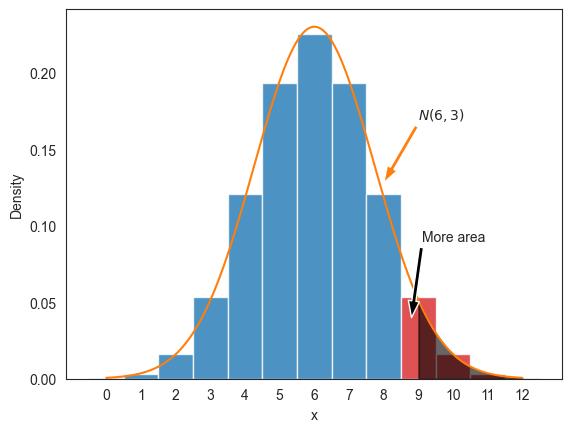

In [67]:
fig, ax = plt.subplots(1, 1)

# 이항분포 확률 질량 함수 그래프
x1 = range(13)
bar_colors = ['tab:blue']*9 + ['tab:red']*4
z = ax.bar(x1, X_12.pmf(x1), color=bar_colors, width=1., alpha=.8)

# 정규분포 확률 밀도 함수 그래프
x2 = np.arange(0, 12, 0.01)
ax.plot(x2, f_gaussian(x2, 6, np.sqrt(3)), color='tab:orange')
ax.fill_between(x2, f_gaussian(x2, 6, np.sqrt(3)), where=(x2 >= 9), color='black', alpha=0.6)

ax.annotate('More area', xy=(8.8, 0.04), xytext=(9.1, 0.09), 
            arrowprops={'facecolor':'k', 'width':3, 'headwidth':8})

# ax.hlines(0.23, 5.5, 6, color='gray', linestyle='solid', linewidth=3)
ax.annotate(r'$N(6, 3)$', xy=(8., f_gaussian(8, 6, np.sqrt(3))+.01), xytext=(9, 0.17), 
            arrowprops={'facecolor':'tab:orange', 'width':3, 'headwidth':8})

ax.set_xticks(range(0, 13))
ax.set_xlabel('x')
ax.set_ylabel('Density')

plt.show()


따라서 이번에도 연속성 보정을 적용하여
연속일 때의 확률값은 $P(X \geq 8.5)$로 계산해야
이산일 때의 $P(X \geq 9)$에 근사한 확률값을 얻는다.

In [68]:
1 - F_gaussian(8.5, 6, np.sqrt(3))

0.074457

**예제: 정상적인 동전을 12번 던져서 앞면이 3번 이상 6번 이하 나올 확률**

이산일 때의 $P(3 \leq X \leq 6)$는 다음과 같다.

In [69]:
P_3between6 = X_12.cdf(6) - X_12.cdf(2)
P_3between6

0.593506

연속일 때의 $P(3 \leq X \leq 6)$는 다음과 같으며 이산일 때보다 작게 계산된다.

In [70]:
F_gaussian(6, 6, np.sqrt(3)) - F_gaussian(3, 6, np.sqrt(3))

0.458368

이번에도 그래프를 그려보면 연속일 때의 확률이 작게 계산되는 이유가 이전 예제에서와 유사한 방식으로 설명될 수 있다.

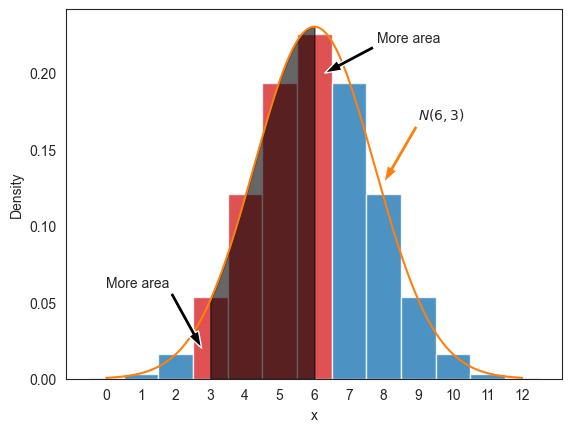

In [71]:
fig, ax = plt.subplots(1, 1)

# 이항분포 확률 질량 함수 그래프
x1 = range(13)
bar_colors = ['tab:blue']*3 + ['tab:red']*4 + ['tab:blue']*6
z = ax.bar(x1, X_12.pmf(x1), color=bar_colors, width=1., alpha=.8)

# 정규분포 확률 밀도 함수 그래프
x2 = np.arange(0, 12, 0.01)
ax.plot(x2, f_gaussian(x2, 6, np.sqrt(3)), color='tab:orange')
ax.fill_between(x2, f_gaussian(x2, 6, np.sqrt(3)), where=(x2 >= 3) & (x2 <= 6), color='black', alpha=0.6)

ax.annotate('More area', xy=(2.75, 0.02), xytext=(0., 0.06), 
            arrowprops={'facecolor':'k', 'width':3, 'headwidth':8})
ax.annotate('More area', xy=(6.3, 0.2), xytext=(7.8, 0.22), 
            arrowprops={'facecolor':'k', 'width':3, 'headwidth':8})

# ax.hlines(0.23, 5.5, 6, color='gray', linestyle='solid', linewidth=3)
ax.annotate(r'$N(6, 3)$', xy=(8., f_gaussian(8, 6, np.sqrt(3))+.01), xytext=(9, 0.17), 
            arrowprops={'facecolor':'tab:orange', 'width':3, 'headwidth':8})

ax.set_xticks(range(0, 13))
ax.set_xlabel('x')
ax.set_ylabel('Density')

plt.show()


따라서 이번에도 연속성 보정을 적용하여
연속일 때의 확률값은 $P(2.5 \leq X \leq 6.5)$로 계산해야
이산일 때의 $P(3 \leq X \leq 6)$에 근사한 확률값을 얻는다.

In [72]:
F_gaussian(6.5, 6, np.sqrt(3)) - F_gaussian(2.5, 6, np.sqrt(3))

0.591931

**연속성 보정 일반화**

이산 확률변수 $X$가 이항분포를 따르며 다음이 성립한다고 가정한다.

$$
X \sim B(n,p), \quad np>5,\quad n(1-p)>5
$$

그러면 확률 변수 $X$를 다음 정규분포를 따르는 연속 확률변수로 간주해도 된다.

$$
X \sim N(np, npq)
$$

하지만 정규분포를 따르는 연속 확률변수로 간주했을 때 경우에 따라 연속성 보정을 다음과 같이
적용해야 한다.

:::{list-table} 연속성 보정
:widths: 50 50
:header-rows: 1
:name: continuity_correction

*   - 이항분포 (이산)
    - 정규분포 (연속)
*   - $P(X \leq a)$
    - $P(X \leq a+0.5)$
*   - $P(X \geq a)$
    - $P(X \geq a-0.5)$
*   - $P(a \leq X \leq b)$
    - $P(a-0.5 \leq X \leq b+0.5)$
:::

**연속성 보정 예제: 5지선다 40문제를 임의로 찍어서 30 문제 이상 맞힐 확률**

5지선다 40문제의 답을 모두 임의로 찍어 15문제 이상을 맞힐 확률을 연속성 보정을 적용하여 다시 계산한다.

5지선다 문제 하나를 임의로 답을 찍어 맞힐 확률은 1/5, 즉 0.2다.
40문제 각각에 대해 임의로 답을 찍는 행위는 서로 독립적이기에
40문제 중에서 맞히는 답의 수는 다음 이항분포를 따른다.

$$
X_{bin} \sim B\left (40, 0.2\right )
$$

아래 `X_discrete` 변수가 이산 확률변수로서의 $X_{bin}$을 가리킨다.

In [73]:
from scipy.stats import binom

n = 40
p = 0.2

X_discrete = binom(n, p)

또한 다음이 성립한다.

$$
40 \cdot 0.2 = 8 >5, \quad 40 \cdot 0.8 = 32>5
$$

따라서 확률변수 $X_{bin}$를 다음 정규분포를 따르는 연속 확률변수로 간주할 수 있다.

$$
X_{bin} \sim N(8, 6.4)
$$

아래 `X_coninuous` 변수가 연속 확률변수로서의 $X_{bin}$을 가리킨다.

In [74]:
X_continuous = norm(8, np.sqrt(6.4))

이산일 때의 $P(X_{bin} \geq 15)$는 다음과 같다.

In [75]:
1 - X_discrete.cdf(14)

0.007916

연속일 때는 연속성 보정을 적용하여 $P(X_{bin} \geq 14.5)$를 계산한다.

In [76]:
1 - X_continuous.cdf(14.5)

0.005094

연속성 보정을 적용하지 않고 $P(X_{bin} \geq 15)$를 계산하면 오차가 더 커진다.

In [77]:
1 - X_continuous.cdf(15)

0.002829

반면에 이산일 때의 $P(X_{bin} \leq 7)$는 다음과 같다.

In [78]:
X_discrete.cdf(7)

0.437146

연속일 때는 연속성 보정을 적용하여 $P(X_{bin} \leq 7.5)$를 계산한다.

In [79]:
X_continuous.cdf(7.5)

0.421662

연속성 보정을 적용하지 않고 $P(X_{bin} \leq 7)$을 계산하면 역시나 오차가 더 커진다.

In [80]:
X_continuous.cdf(7)

0.346316

## 연습문제

참고: [(연습) 정규분포](https://colab.research.google.com/github/codingalzi/DataSci/blob/master/practices/practice-normal_distribution.ipynb)